In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import dataframe_image as dfi
!pip install dataframe_image
# from config import Steam_key


In [68]:
from pathlib import Path
game_sales = Path("Video_Games.csv")
game_sales_df = pd.read_csv(game_sales)
game_sales_df.head()
game_sales_df = df_filtered = game_sales_df[game_sales_df['Global_Sales'] >= 1.0]

In [69]:
genre_counts = game_sales_df['Genre'].value_counts()
genre_counts

Action          421
Sports          305
Shooter         256
Role-Playing    203
Platform        194
Racing          182
Misc            169
Fighting        125
Simulation       93
Puzzle           55
Adventure        41
Strategy         31
Name: Genre, dtype: int64

In [70]:
ttl_NA_sales = game_sales_df['NA_Sales'].sum()

NA_genre_ttl_sales = game_sales_df.groupby('Genre')['NA_Sales'].sum()

NA_Genre_pert = (NA_genre_ttl_sales/ttl_NA_sales)*100

print(NA_Genre_pert.sort_values(ascending = False))

NA_pert_sales_genre = NA_Genre_pert.sort_values(ascending = False)


#plt.bar(NA_pert_sales_genre.index, NA_pert_sales_genre.values, color = 'blue', alpha = 1, align = 'center')

#plt.xlabel('Genre') 
#plt.ylabel('Percentage of Total Sales') 
#plt.title('Percentage of Total North American Sales by Genre')
#plt.xticks(rotation=90)
#plt.show()

Genre
Action          18.689107
Shooter         16.077986
Sports          13.737821
Platform        12.359064
Role-Playing     8.391378
Misc             8.387441
Racing           8.103958
Fighting         5.153517
Simulation       3.392846
Puzzle           2.836260
Adventure        1.604613
Strategy         1.202296
Name: NA_Sales, dtype: float64


In [71]:
ttl_EU_sales = game_sales_df['EU_Sales'].sum()

EU_genre_ttl_sales = game_sales_df.groupby('Genre')['EU_Sales'].sum()

EU_Genre_pert = (EU_genre_ttl_sales/ttl_EU_sales)*100

print(EU_Genre_pert.sort_values(ascending = False))

EU_pert_sales_genre = EU_Genre_pert.sort_values(ascending = False)

#plt.bar(EU_pert_sales_genre.index, EU_pert_sales_genre.values, color = 'red', alpha = 1, align = 'center')

#plt.xlabel('Genre') 
#plt.ylabel('Percentage of Total Sales') 
#plt.title('Percentage of Total EU Sales by Genre')
#plt.xticks(rotation=90)
#plt.show()

Genre
Action          20.503116
Sports          15.461712
Shooter         14.164748
Racing           9.639839
Platform         9.480732
Role-Playing     8.561648
Misc             8.371804
Simulation       4.805757
Fighting         4.019262
Puzzle           1.969553
Adventure        1.815267
Strategy         1.174620
Name: EU_Sales, dtype: float64


In [72]:
ttl_JP_sales = game_sales_df['JP_Sales'].sum()

JP_genre_ttl_sales = game_sales_df.groupby('Genre')['JP_Sales'].sum()

JP_Genre_pert = (JP_genre_ttl_sales/ttl_JP_sales)*100

print(JP_Genre_pert.sort_values(ascending = False))


JP_pert_sales_genre = JP_Genre_pert.sort_values(ascending = False)


#plt.bar(JP_pert_sales_genre.index, JP_pert_sales_genre.values, color = 'blue', alpha = 1, align = 'center')

#plt.xlabel('Genre') 
#plt.ylabel('Percentage of Total Sales') 
#plt.title('Percentage of Total Japanese Sales by Genre')
#plt.xticks(rotation=90)
#plt.show()

Genre
Role-Playing    30.767645
Platform        15.362526
Action          10.642888
Sports           8.775642
Misc             7.442877
Racing           6.170566
Fighting         5.406631
Puzzle           5.096110
Simulation       4.725134
Shooter          3.065360
Adventure        1.310782
Strategy         1.233839
Name: JP_Sales, dtype: float64


In [73]:
Genre_salespercentage_df= pd.DataFrame({'NA_Genre_%_sales': NA_Genre_pert,
              'EU_Genre_%_sales': EU_Genre_pert,
              'JP_Genre_%_sales':JP_Genre_pert})

Genre_salespercentage_df

,NA_Genre_%_sales,EU_Genre_%_sales,JP_Genre_%_sales
Genre,,,
Action,18.689107,20.503116,10.642888
Adventure,1.604613,1.815267,1.310782
Fighting,5.153517,4.019262,5.406631
Misc,8.387441,8.371804,7.442877
Platform,12.359064,9.480732,15.362526
Puzzle,2.836260,1.969553,5.096110
Racing,8.103958,9.639839,6.170566
Role-Playing,8.391378,8.561648,30.767645
Shooter,16.077986,14.164748,3.065360


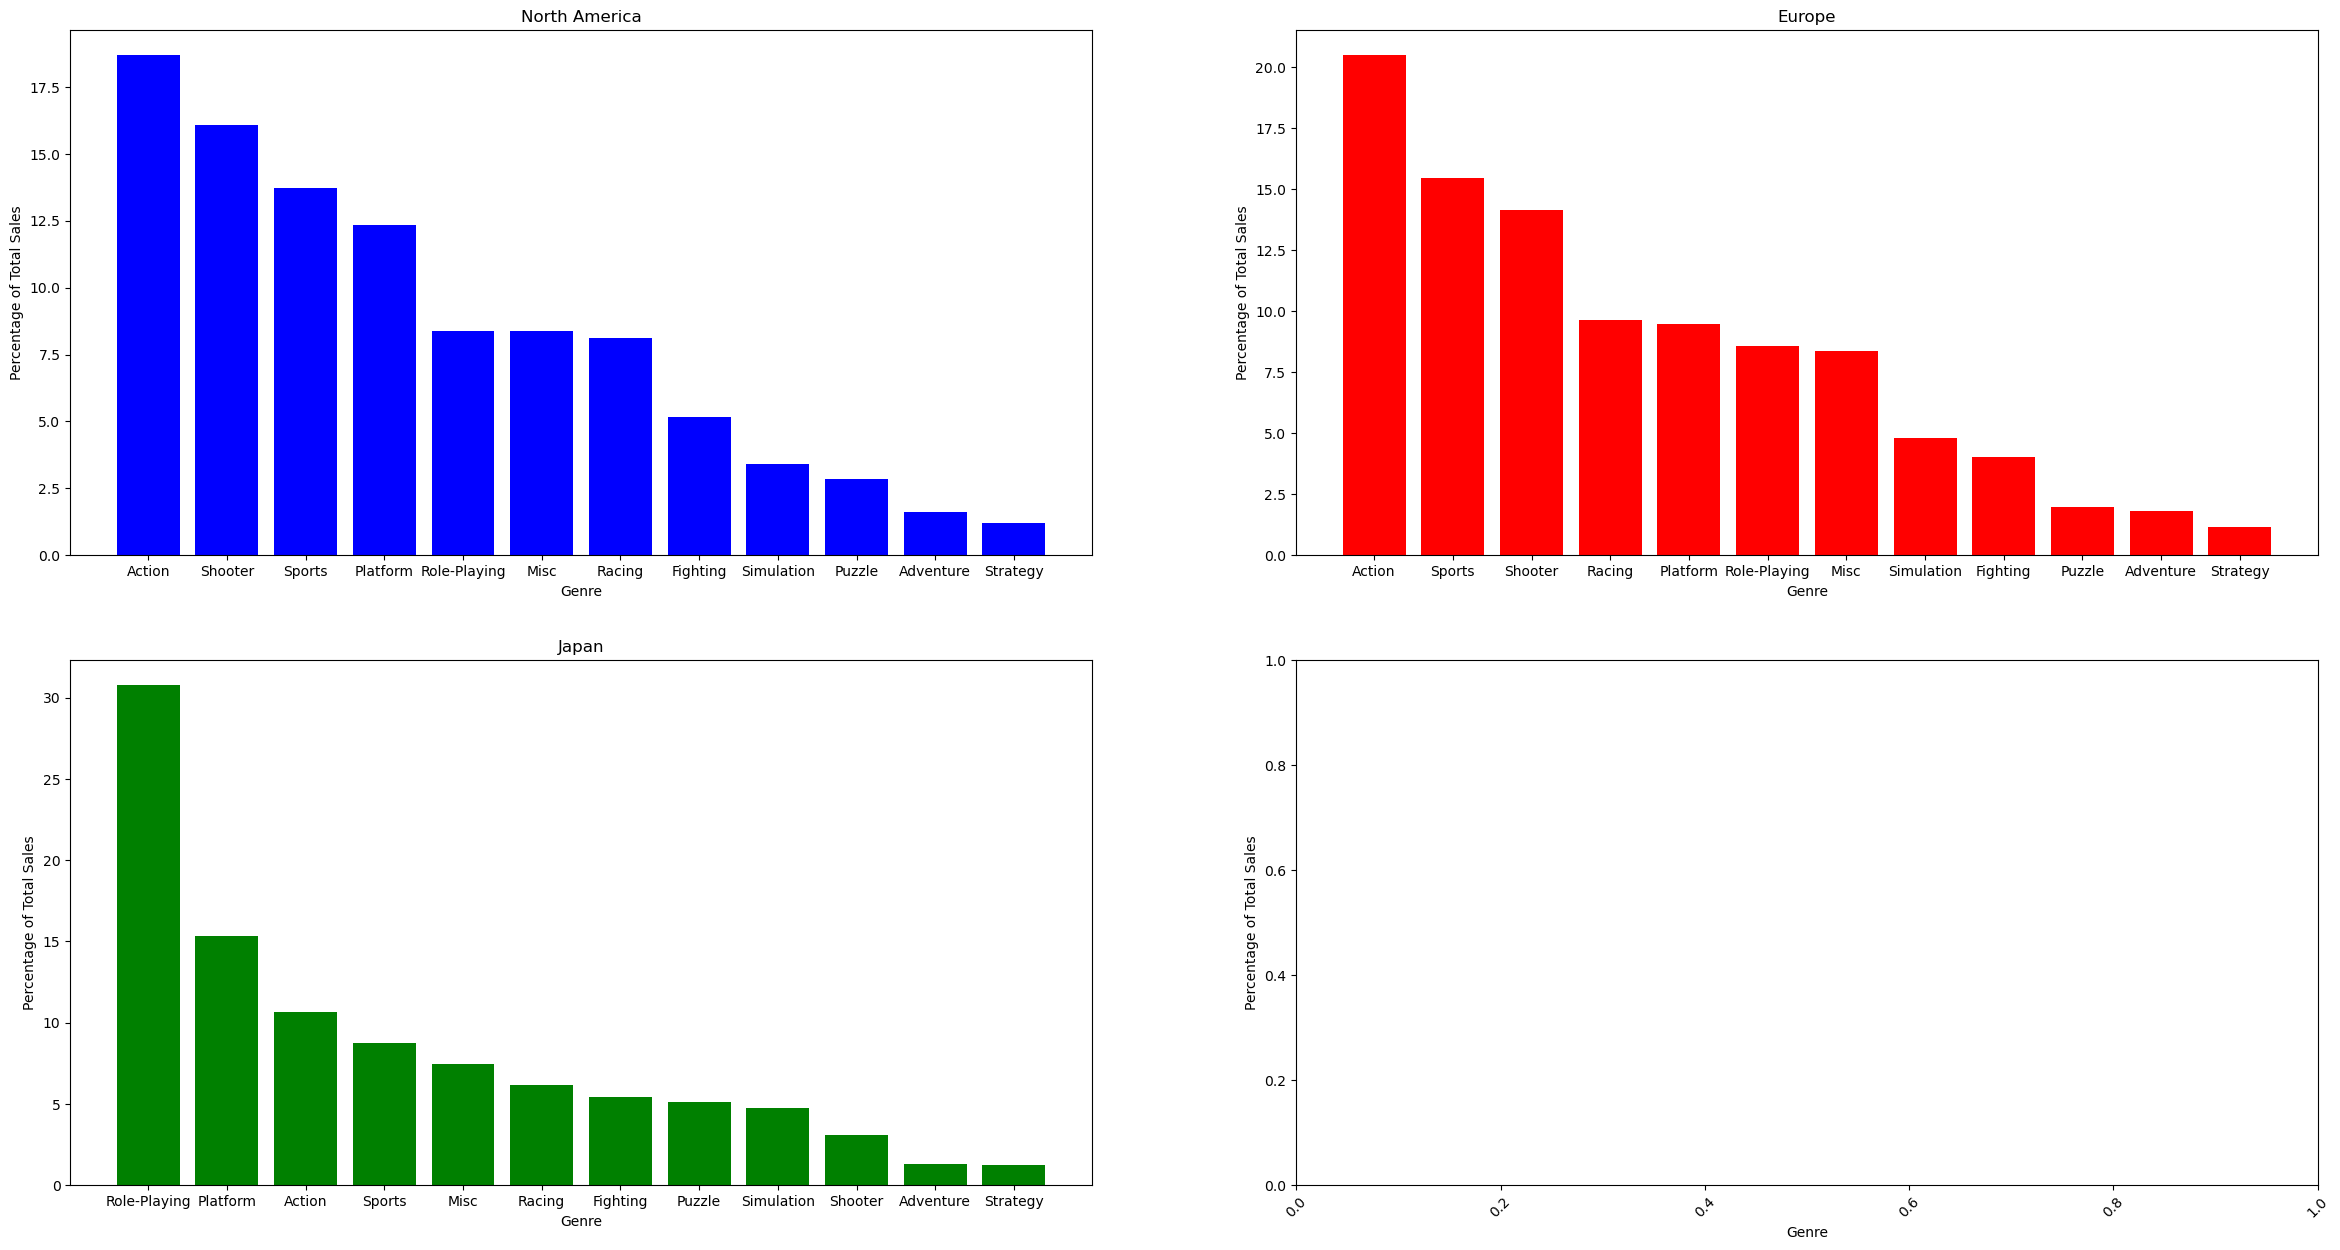

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(29, 15))

axs[0, 0].bar(NA_pert_sales_genre.index, NA_pert_sales_genre.values, color = 'blue', alpha = 1)
axs[0, 0].set_title('North America')

axs[0, 1].bar(EU_pert_sales_genre.index, EU_pert_sales_genre.values, color = 'red', alpha = 1)
axs[0, 1].set_title('Europe')

axs[1, 0].bar(JP_pert_sales_genre.index, JP_pert_sales_genre.values, color = 'green', alpha = 1)
axs[1, 0].set_title('Japan')



for ax in axs.flat:
    ax.set(xlabel='Genre', ylabel='Percentage of Total Sales')

#for ax in axs.flat:
    #ax.label_outer()

ax.tick_params(axis='x', rotation=45)    
    
plt.show()

In [75]:
Yr = game_sales_df['Year_of_Release'].value_counts()

game_sales_df['Year_of_Release'].dtypes


dtype('float64')

In [76]:
game_sales_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [109]:
game_sales_df2 = game_sales_df.copy()

game_sales_df2['NA_game_count'] = game_sales_df2['NA_Sales'].apply(lambda n: n>0)
NA_publisher_df = game_sales_df2.groupby('Publisher')[['NA_Sales','NA_game_count']].sum().sort_values(by='NA_Sales',ascending=False)

NA_publisher_df['NA_avg_ppg'] = NA_publisher_df['NA_Sales']/NA_publisher_df['NA_game_count']
NA_publisher_df['NA_avg_ppg'] = round(NA_publisher_df['NA_avg_ppg'], 2)
print('Sales Numbers in $M')
NA_publisher_df.head(10)
dfi.export(NA_publisher_df.head(10), 'NApub.png')

Sales Numbers in $M


In [108]:
game_sales_df2['EU_game_count'] = game_sales_df2['EU_Sales'].apply(lambda n: n>0)
EU_publisher_df = game_sales_df2.groupby('Publisher')[['EU_Sales','EU_game_count']].sum().sort_values(by='EU_Sales',ascending=False)

EU_publisher_df['EU_avg_ppg'] = EU_publisher_df['EU_Sales']/EU_publisher_df['EU_game_count']
EU_publisher_df['EU_avg_ppg'] = round(EU_publisher_df['EU_avg_ppg'], 2)
print('Sales Numbers in $M')
EU_publisher_df.head(10)
dfi.export(EU_publisher_df.head(10), 'EUpub.png')

Sales Numbers in $M


In [106]:
game_sales_df2['JP_game_count'] = game_sales_df2['JP_Sales'].apply(lambda n: n>0)
JP_publisher_df = game_sales_df2.groupby('Publisher')[['JP_Sales','JP_game_count']].sum().sort_values(by='JP_Sales',ascending=False)

JP_publisher_df['JP_avg_ppg'] = JP_publisher_df['JP_Sales']/JP_publisher_df['JP_game_count']
JP_publisher_df['JP_avg_ppg'] = round(JP_publisher_df['JP_avg_ppg'], 2)
print('Sales Numbers in $M')
JP_publisher_df.head(10)

dfi.export(JP_publisher_df.head(10), 'JPpub.png')

Sales Numbers in $M


In [105]:
game_sales_df2['Other_game_count'] = game_sales_df2['Other_Sales'].apply(lambda n: n>0)
OT_publisher_df = game_sales_df2.groupby('Publisher')[['Other_Sales','Other_game_count']].sum().sort_values(by='Other_Sales',ascending=False)

OT_publisher_df['Other_avg_ppg'] = OT_publisher_df['Other_Sales']/OT_publisher_df['Other_game_count']
OT_publisher_df['Other_avg_ppg'] = round(OT_publisher_df['Other_avg_ppg'], 2)
print('Sales Numbers in $M')
OT_publisher_df.head(10)
dfi.export(OT_publisher_df.head(10), 'OTpub.png')

Sales Numbers in $M


In [107]:
game_sales_df2['Global_game_count'] = game_sales_df2['Global_Sales'].apply(lambda n: n>0)
GB_publisher_df = game_sales_df2.groupby('Publisher')[['Global_Sales','Global_game_count']].sum().sort_values(by='Global_Sales',ascending=False)

GB_publisher_df['Global_avg_ppg'] = GB_publisher_df['Global_Sales']/GB_publisher_df['Global_game_count']
GB_publisher_df['Global_avg_ppg'] = round(GB_publisher_df['Global_avg_ppg'], 2)
print('Sales Numbers in $M')
GB_publisher_df.head(10)
dfi.export(GB_publisher_df.head(10), 'GBpub.png')

Sales Numbers in $M


In [111]:
game_sales_df3 = game_sales_df.copy()

game_sales_df3['NA_game_count'] = game_sales_df2['NA_Sales'].apply(lambda n: n>0)
NA_genre_df = game_sales_df3.groupby('Genre')[['NA_Sales','NA_game_count']].sum().sort_values(by='NA_Sales',ascending=False)

NA_genre_df['NA_avg_ppg'] = NA_genre_df['NA_Sales']/NA_genre_df['NA_game_count']
NA_genre_df['NA_avg_ppg'] = round(NA_genre_df['NA_avg_ppg'], 2)
print('Sales Numbers in $M')
NA_genre_df.head(10)
dfi.export(NA_genre_df.head(10), 'NAgenre.png')

Sales Numbers in $M


In [116]:
game_sales_df3['EU_game_count'] = game_sales_df2['EU_Sales'].apply(lambda n: n>0)
EU_genre_df = game_sales_df3.groupby('Genre')[['EU_Sales','EU_game_count']].sum().sort_values(by='EU_Sales',ascending=False)

EU_genre_df['EU_avg_ppg'] = EU_genre_df['EU_Sales']/EU_genre_df['EU_game_count']
EU_genre_df['EU_avg_ppg'] = round(EU_genre_df['EU_avg_ppg'], 2)
print('Sales Numbers in $M')
EU_genre_df.head(10)
dfi.export(EU_genre_df.head(10), 'EUgenre.png')

Sales Numbers in $M


In [117]:
game_sales_df3 = game_sales_df.copy()
game_sales_df3['JP_game_count'] = game_sales_df2['JP_Sales'].apply(lambda n: n>0)
JP_genre_df = game_sales_df3.groupby('Genre')[['JP_Sales','JP_game_count']].sum().sort_values(by='JP_Sales',ascending=False)

JP_genre_df['JP_avg_ppg'] = JP_genre_df['JP_Sales']/JP_genre_df['JP_game_count']
JP_genre_df['JP_avg_ppg'] = round(JP_genre_df['JP_avg_ppg'], 2)
print('Sales Numbers in $M')
JP_genre_df.head(10)
dfi.export(JP_genre_df.head(10), 'JPgenre.png')

Sales Numbers in $M


In [120]:
game_sales_df3['OT_game_count'] = game_sales_df2['Other_Sales'].apply(lambda n: n>0)
OT_genre_df = game_sales_df3.groupby('Genre')[['Other_Sales','OT_game_count']].sum().sort_values(by='Other_Sales',ascending=False)

OT_genre_df['OT_avg_ppg'] = OT_genre_df['Other_Sales']/OT_genre_df['OT_game_count']
OT_genre_df['OT_avg_ppg'] = round(OT_genre_df['OT_avg_ppg'], 2)
print('Sales Numbers in $M')
OT_genre_df.head(100)
dfi.export(OT_genre_df.head(10), 'OTgenre.png')

Sales Numbers in $M


In [123]:
game_sales_df3['GB_game_count'] = game_sales_df2['Global_Sales'].apply(lambda n: n>0)
GB_genre_df = game_sales_df3.groupby('Genre')[['Global_Sales','GB_game_count']].sum().sort_values(by='Global_Sales',ascending=False)

GB_genre_df['GB_avg_ppg'] = GB_genre_df['Global_Sales']/GB_genre_df['GB_game_count']
GB_genre_df['GB_avg_ppg'] = round(GB_genre_df['GB_avg_ppg'], 2)
print('Sales Numbers in $M')
GB_genre_df.head(10)
dfi.export(GB_genre_df.head(10), 'GBgenre.png')

Sales Numbers in $M


In [87]:
x = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
genre_df=game_sales_df3.groupby('Genre')[x].sum()
genre_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,522.14,340.20,77.46,122.61
Adventure,44.83,30.12,9.54,6.92
Fighting,143.98,66.69,39.35,23.74
Misc,234.33,138.91,54.17,45.18
Platform,345.29,157.31,111.81,38.24
Puzzle,79.24,32.68,37.09,7.44
Racing,226.41,159.95,44.91,53.86
Role-Playing,234.44,142.06,223.93,41.83
Shooter,449.19,235.03,22.31,79.20


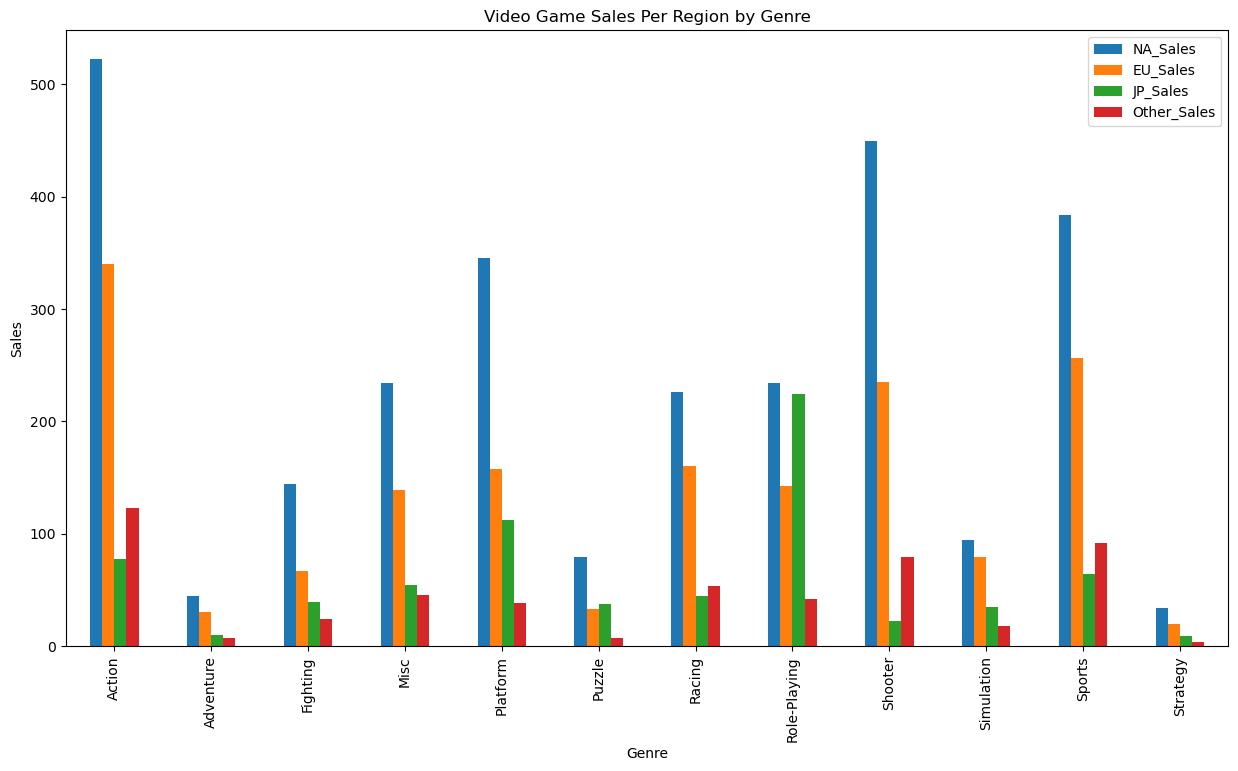

In [126]:
genre_df.plot(kind='bar',figsize=(15,8))
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title('Video Game Sales Per Region by Genre');
dfi.export(genre_df.head(10), 'Bargenre.png')

In [91]:
# Group the data by Publisher and calculate the sum of global sales for each publisher
publisher_sales = game_sales_df.groupby('Publisher')['Global_Sales'].sum()
# Sort the data by global sales in descending order
sorted_publishers = publisher_sales.sort_values(ascending=False)
# Get the top 10 publishers by global sales
top_10_publishers = sorted_publishers.head(10)
# Display the top 10 publishers by global sales
print(top_10_publishers)

Publisher
Nintendo                        1655.89
Electronic Arts                  745.46
Activision                       493.34
Sony Computer Entertainment      435.47
Take-Two Interactive             310.34
Ubisoft                          266.00
Microsoft Game Studios           210.34
THQ                              151.37
Sega                             139.85
Konami Digital Entertainment     128.98
Name: Global_Sales, dtype: float64


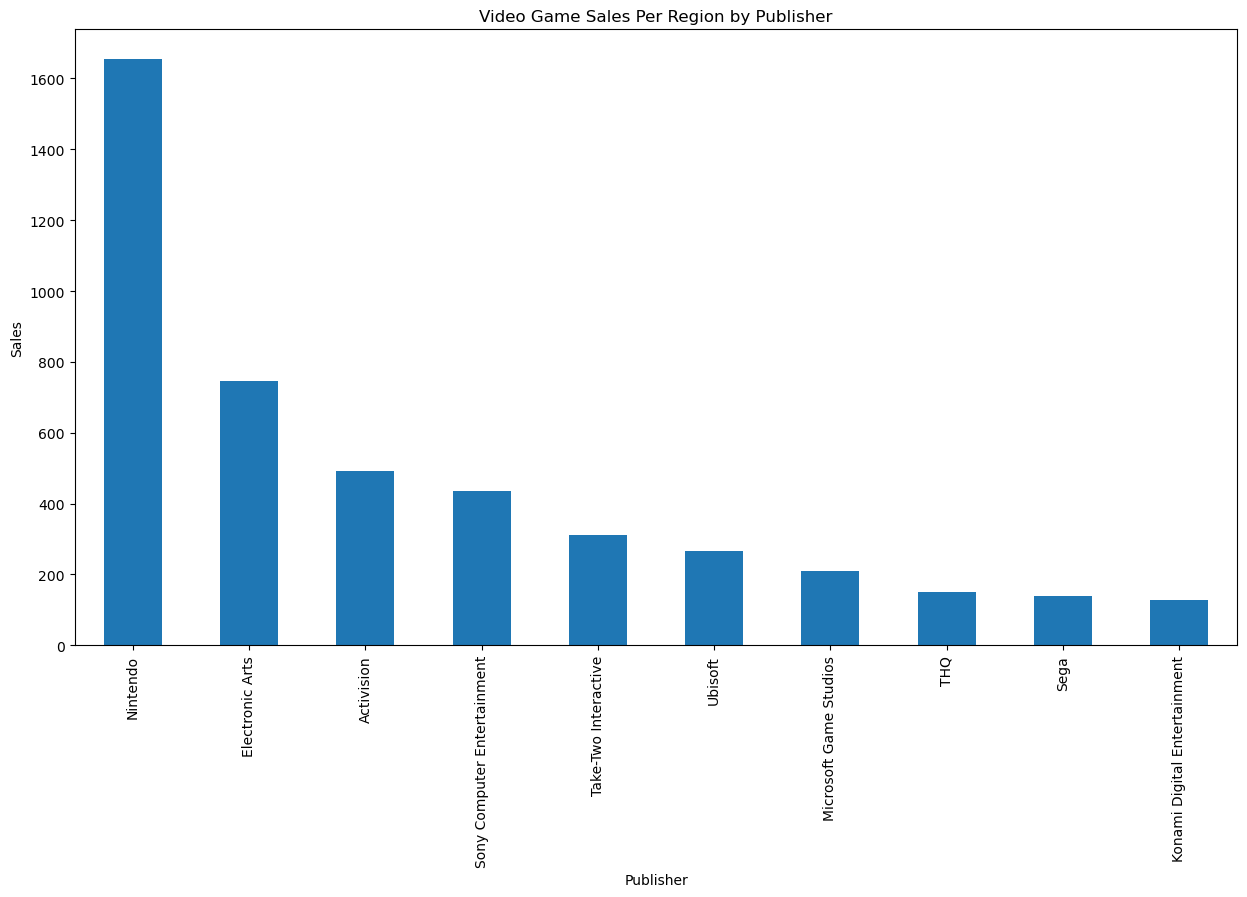

In [125]:
top_10_publishers.plot(kind='bar',figsize=(15,8))
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.title('Video Game Sales Per Region by Publisher');

In [24]:
pd.concat([NA_publisher_df, EU_publisher_df, JP_publisher_df],axis=1)


,NA_Sales,NA_game_count,NA_avg_ppg,EU_Sales,EU_game_count,EU_avg_ppg,JP_Sales,JP_game_count,JP_avg_ppg
Genre,,,,,,,,,
Action,522.14,418,1.25,340.20,414,0.82,77.46,271,0.29
Shooter,449.19,254,1.77,235.03,252,0.93,22.31,166,0.13
Sports,383.81,295,1.30,256.55,291,0.88,63.87,144,0.44
Platform,345.29,189,1.83,157.31,189,0.83,111.81,144,0.78
Role-Playing,234.44,177,1.32,142.06,170,0.84,223.93,172,1.30
Misc,234.33,155,1.51,138.91,157,0.88,54.17,72,0.75
Racing,226.41,179,1.26,159.95,180,0.89,44.91,105,0.43
Fighting,143.98,122,1.18,66.69,119,0.56,39.35,83,0.47
Simulation,94.79,87,1.09,79.74,86,0.93,34.39,43,0.80


In [25]:
game_sales_df3['Genre']

0             Sports
1           Platform
2             Racing
3             Sports
4       Role-Playing
            ...     
2071          Sports
2072          Sports
2073          Action
2074        Platform
2075            Misc
Name: Genre, Length: 2076, dtype: object